In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("D:\\shru\\Sem 5\\ML\\files\\ccfraud.csv")

In [6]:
X=df.drop('Y',axis=1)

In [7]:
#this or
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feature=minmax_scale.fit_transform(X)

In [8]:
#this
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=X.columns)
data_scaled.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.000048,0.969135,0.000097,0.000097,0.000048,0.001163,0.000097,0.000097,-0.000048,-0.000048,...,0.033387,0.000000,0.000000,0.000000,0.000000,0.033387,0.000000,0.000000,0.000000,0.000000
1,0.000017,0.998005,0.000017,0.000017,0.000017,0.000216,-0.000008,0.000017,0.000000,0.000000,...,0.022305,0.027212,0.028734,0.027121,0.000000,0.008317,0.008317,0.008317,0.000000,0.016633
2,0.000030,0.898265,0.000020,0.000020,0.000020,0.000339,0.000000,0.000000,0.000000,0.000000,...,0.135329,0.143034,0.149192,0.155190,0.015151,0.014971,0.009981,0.009981,0.009981,0.049904
3,0.000037,0.456620,0.000018,0.000018,0.000009,0.000338,0.000000,0.000000,0.000000,0.000000,...,0.450145,0.258575,0.264465,0.269835,0.018265,0.018438,0.010959,0.010046,0.009763,0.009132
4,0.000062,0.615783,0.000012,0.000025,0.000012,0.000702,-0.000012,0.000000,-0.000012,0.000000,...,0.441331,0.257890,0.235795,0.235611,0.024631,0.451750,0.123157,0.110841,0.008485,0.008362


In [13]:
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
Y=df.Y

In [15]:
X_train,X_test,y_train,y_test = train_test_split(scaled_feature,Y,test_size=0.3,random_state=0)

In [19]:
clf=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=24,
                 solver='adam',verbose=1,random_state=21)

In [20]:
clf.fit(X_train,y_train)

Iteration 1, loss = 0.63635648
Iteration 2, loss = 0.52486522
Iteration 3, loss = 0.48952683
Iteration 4, loss = 0.47466896
Iteration 5, loss = 0.46831944
Iteration 6, loss = 0.46465095
Iteration 7, loss = 0.46142195
Iteration 8, loss = 0.45920852
Iteration 9, loss = 0.45727001
Iteration 10, loss = 0.45602350
Iteration 11, loss = 0.45471555
Iteration 12, loss = 0.45401232
Iteration 13, loss = 0.45306618
Iteration 14, loss = 0.45259595
Iteration 15, loss = 0.45169316
Iteration 16, loss = 0.45134255
Iteration 17, loss = 0.45064506
Iteration 18, loss = 0.44994232
Iteration 19, loss = 0.44978654
Iteration 20, loss = 0.44913869
Iteration 21, loss = 0.44872295
Iteration 22, loss = 0.44861149
Iteration 23, loss = 0.44775249
Iteration 24, loss = 0.44746698


C:\Users\91913\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=24, random_state=21,
              verbose=1)

In [22]:
y_pred=clf.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred)

0.822

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[6679,  381],
       [1221,  719]], dtype=int64)

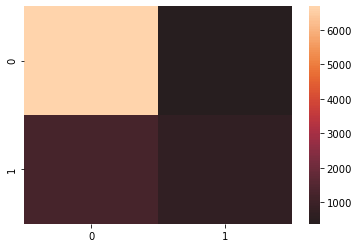

In [27]:
%matplotlib inline
import seaborn as sns
sns.heatmap(cm,center=True)
plt.show()